In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("UsArrests.csv")
df = df.set_index("City")
df.head()

,Murder,Assault,UrbanPop,Rape
City,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [2]:
# Statistics summary

df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [3]:
#To set the decimal precision:
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

#The describe function give us insight into the statistical properties of the columns
stats = df.describe()
selected_stats = stats.loc[["mean","std","min","max"]].transpose() #select relevant rows
selected_stats

,mean,std,min,max
Murder,7.79,4.36,0.80,17.40
Assault,170.76,83.34,45.00,337.00
UrbanPop,65.54,14.47,32.00,91.00
Rape,21.23,9.37,7.30,46.00


In [4]:
# Count missing values
missing = df.isnull().sum()
relevant_missing = pd.DataFrame(missing, columns=["missing"])
relevant_missing

,missing
Murder,0
Assault,0
UrbanPop,0
Rape,0


In [5]:
# Examine types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


<AxesSubplot:xlabel='City'>

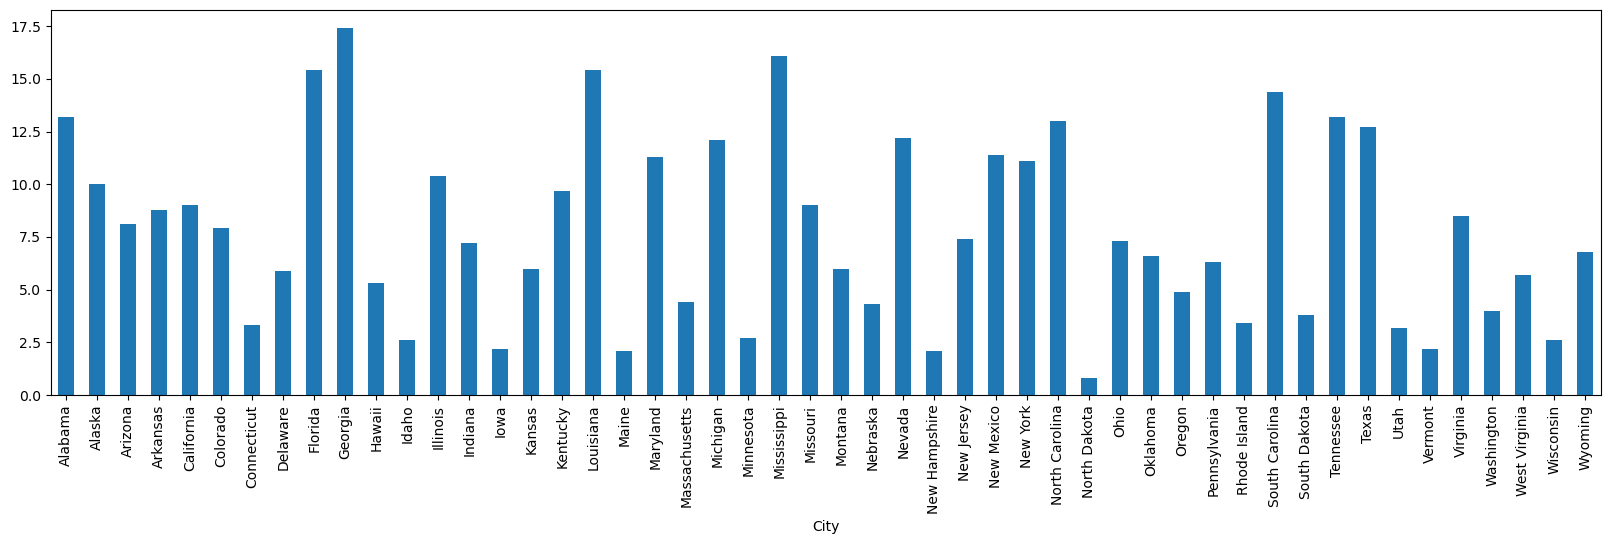

In [6]:
# Murder rate
plt.figure(figsize=(20,5))
df.groupby('City')['Murder'].max().plot(kind='bar')

# Highest Murder Rate : Georgia and Missisippi
# Lowest Murder Rate : North Dakota

<AxesSubplot:xlabel='City'>

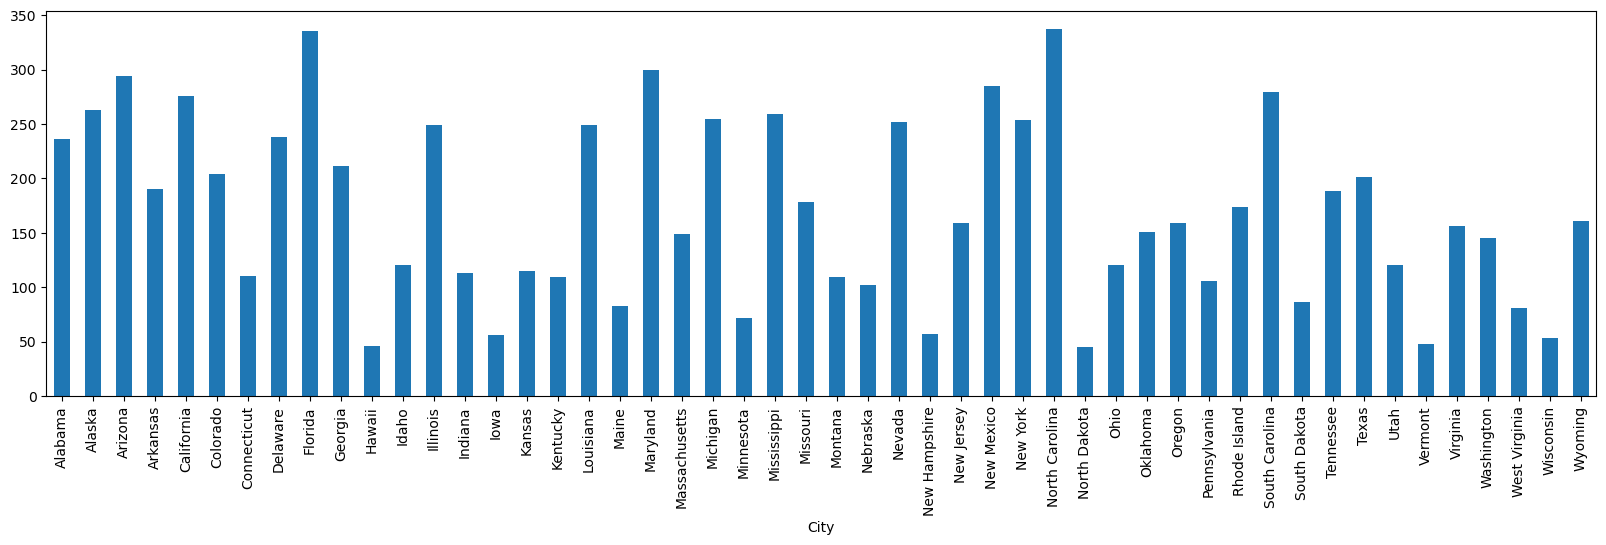

In [7]:
# Assault rate
plt.figure(figsize=(20,5))
df.groupby('City')['Assault'].max().plot(kind='bar')

# Highest Assault Rate : Florida and North California.
# Lowest Assault Rate : Hawaii, North Dakota, Vermont.

<AxesSubplot:xlabel='City'>

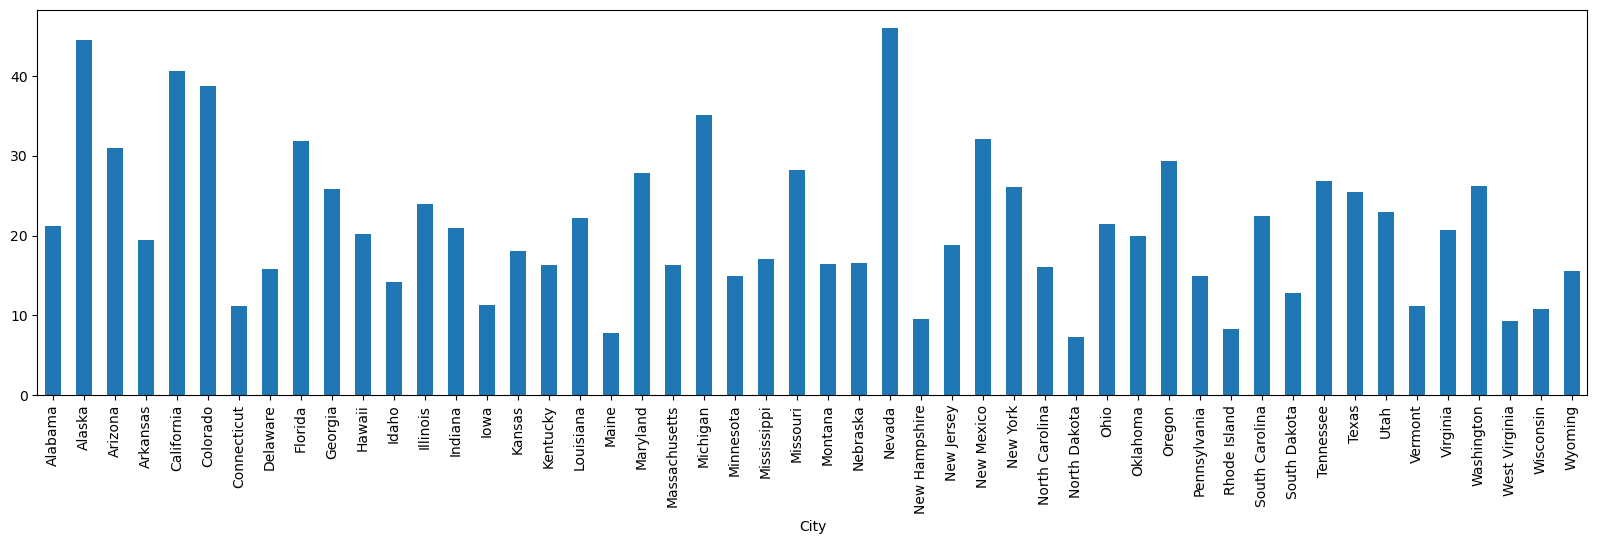

In [8]:
# Rape rate
plt.figure(figsize=(20,5))
df.groupby('City')['Rape'].max().plot(kind='bar')

# Highest rape Rate : Nevada and Alaska.
# Lowest rape Rate : Maine, North Dakota.

<AxesSubplot:xlabel='City'>

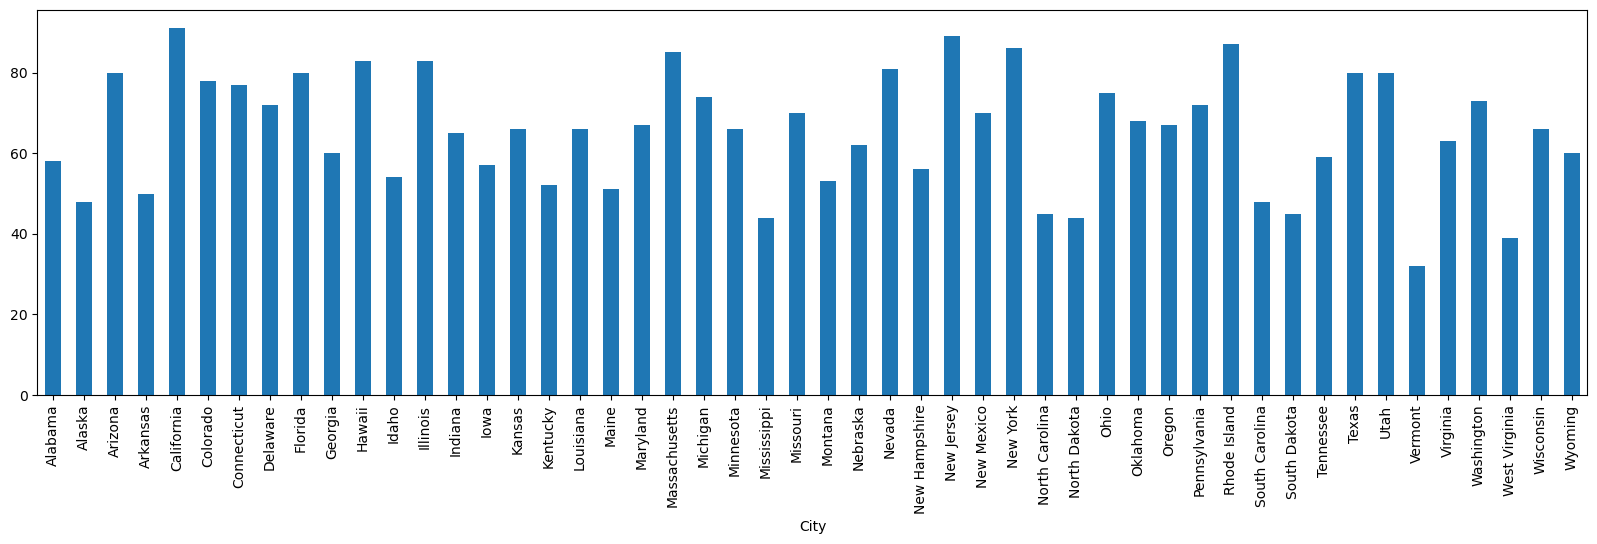

In [9]:
# Urban population percentage
plt.figure(figsize=(20,5))
df.groupby('City')['UrbanPop'].max().plot(kind='bar')

Text(0, 0.5, 'Murder Rate')

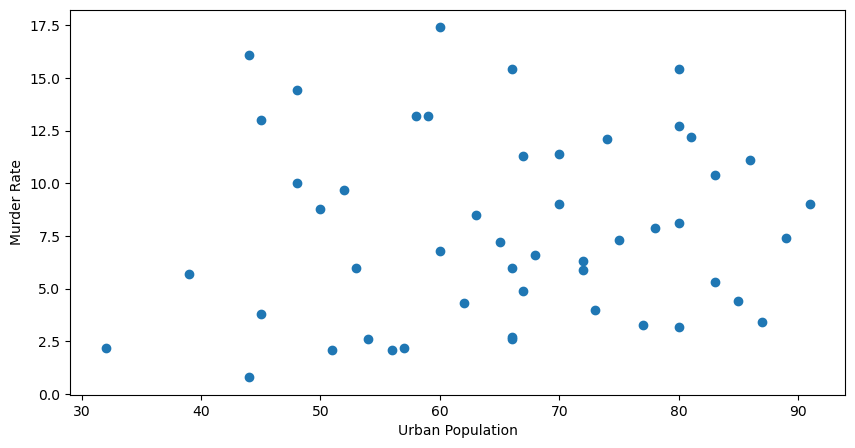

In [10]:
plt.figure(figsize=(10,5))
plt.scatter('UrbanPop','Murder',data=df)
plt.xlabel('Urban Population')
plt.ylabel('Murder Rate')

Text(0, 0.5, 'Rape Rate')

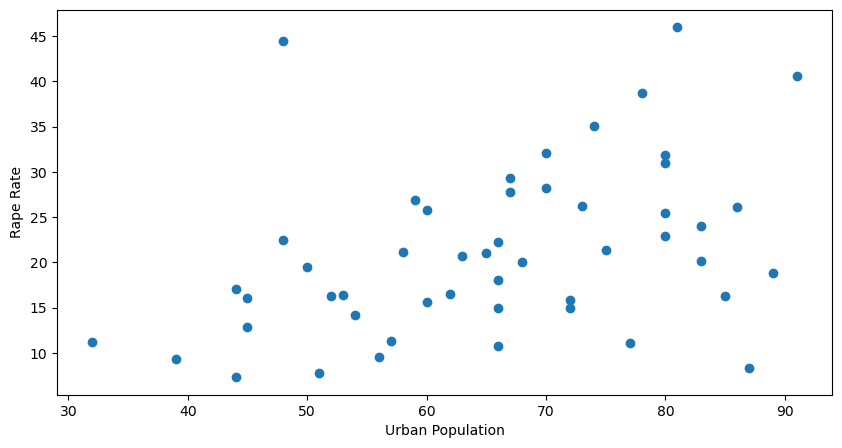

In [11]:
plt.figure(figsize=(10,5))
plt.scatter('UrbanPop','Rape',data=df)
plt.xlabel('Urban Population')
plt.ylabel('Rape Rate')

Text(0, 0.5, 'Assault Rate')

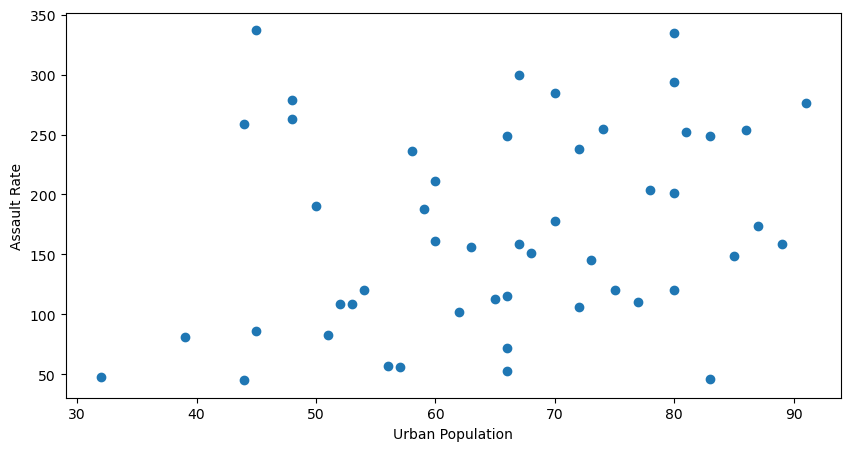

In [12]:
plt.figure(figsize=(10,5))
plt.scatter('UrbanPop','Assault',data=df)
plt.xlabel('Urban Population')
plt.ylabel('Assault Rate')

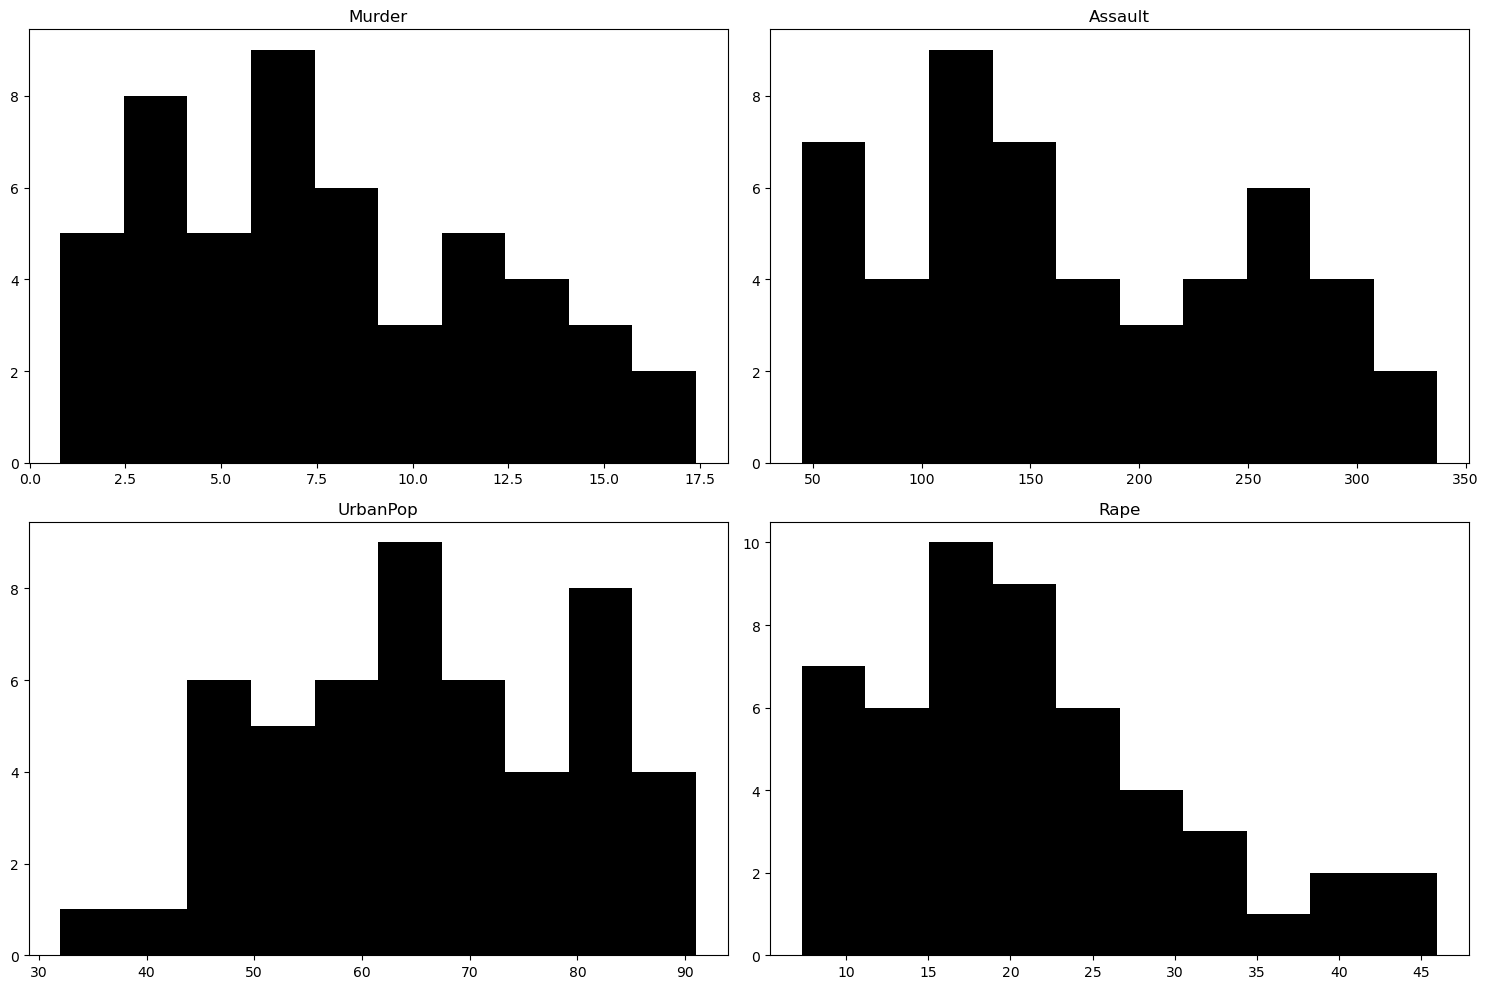

In [13]:
# Plot histograms
histograms = df.hist(color='black', grid=False, figsize=(15, 10)) #This can also be done for each column individually by calling hist on that column
plt.tight_layout()
plt.show()

In [14]:
# Create summary table
frames = [relevant_missing,selected_stats]
summary = pd.concat(frames, axis=1)
summary.rename(columns = {0:"missing"}, inplace = True)
summary.to_csv('summary.csv', index=True) 
summary


,missing,mean,std,min,max
Murder,0,7.79,4.36,0.80,17.40
Assault,0,170.76,83.34,45.00,337.00
UrbanPop,0,65.54,14.47,32.00,91.00
Rape,0,21.23,9.37,7.30,46.00


# At first glance, the Assault rate variable stands out as having a mean and standard deviation that is significantly higher than the other variables. This is expected as the Assault rate is a measure of the number of violent crimes per 100,000 people, while the other variables in the dataset measure different aspects of crime and crime statistics. Scaling the data will be useful in order to keep the Assault rate from having an undue impact on the analysis.

/var/folders/24/wb8dcgpn6dggm5_f9xn5ql4r0000gn/T/ipykernel_49086/869853498.py:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask_ut = np.triu(np.ones(df.shape)).astype(np.bool)


<AxesSubplot:ylabel='City'>

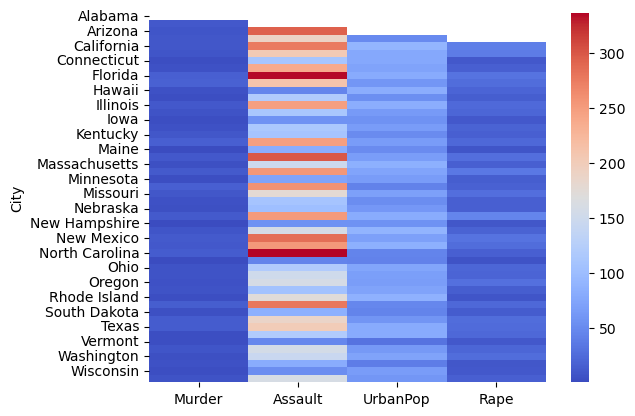

In [15]:
# Get the index for the states
states = df.index

# Get the column labels
labels = df.columns

# Calculate the correlations between the variables
correlations = df.corr()

# Create a triangular mask to visualize the upper triangle of the matrix
mask_ut = np.triu(np.ones(df.shape)).astype(np.bool)

# Visualize the correlations using a heatmap
sns.heatmap(df, mask=mask_ut, cmap="coolwarm")


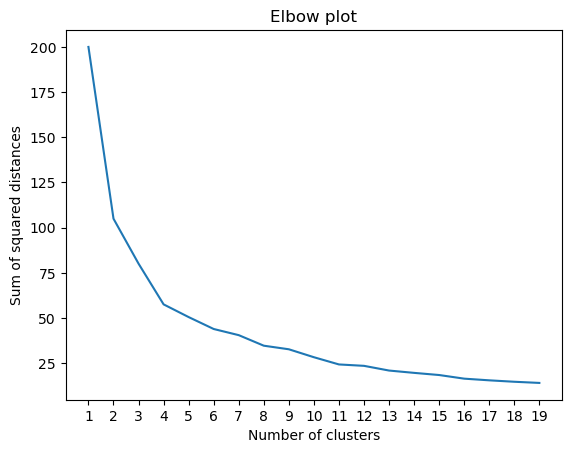

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Look for optimal number of clusters in the dataset
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Fit the KMeans model for different numbers of clusters
SSE = []
for cluster in range(1, 20):
    kmeans = KMeans(n_clusters=cluster, random_state=0)
    kmeans.fit(df_scaled)
    SSE.append(kmeans.inertia_)

# Plot the elbow plot
plt.plot(range(1, 20), SSE)
plt.title("Elbow plot")
plt.xlabel("Number of clusters")
plt.ylabel("Sum of squared distances")

plt.xticks(range(1, 20))

plt.show()



# The optimal number of clusters for dataset is 4. This means that the data can be partitioned into 4 clusters that best represent the underlying structure of the data.

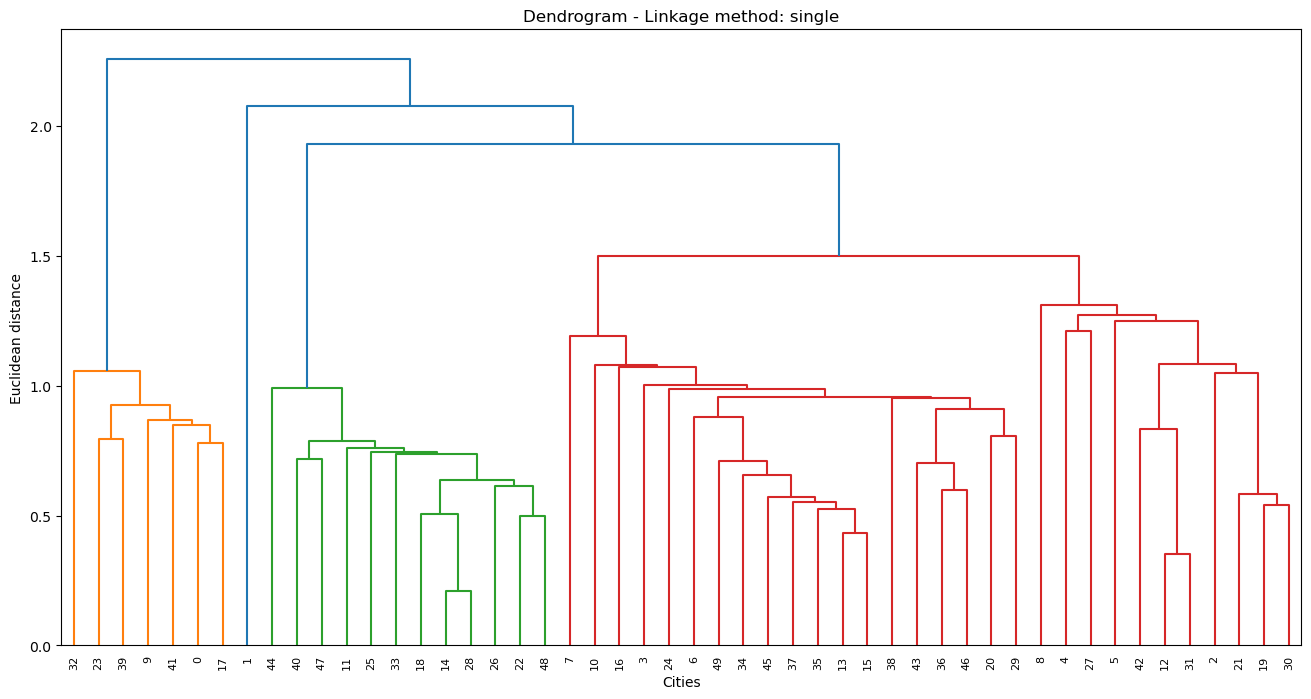

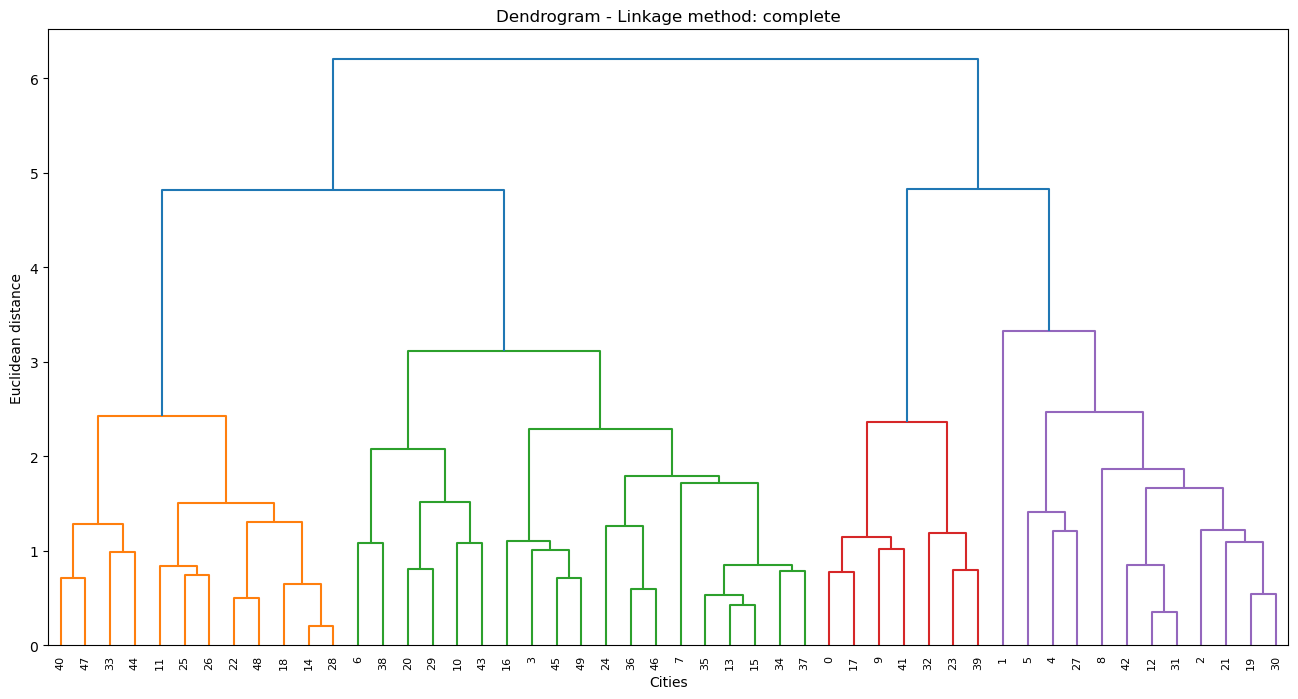

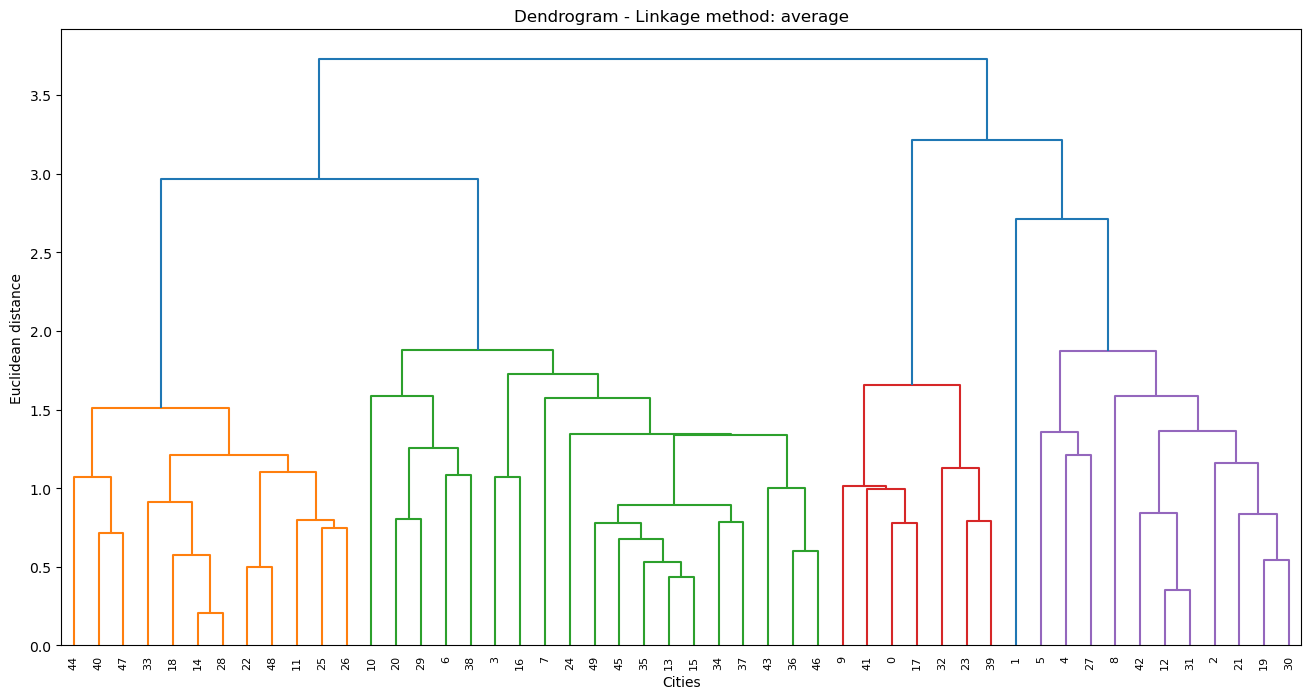

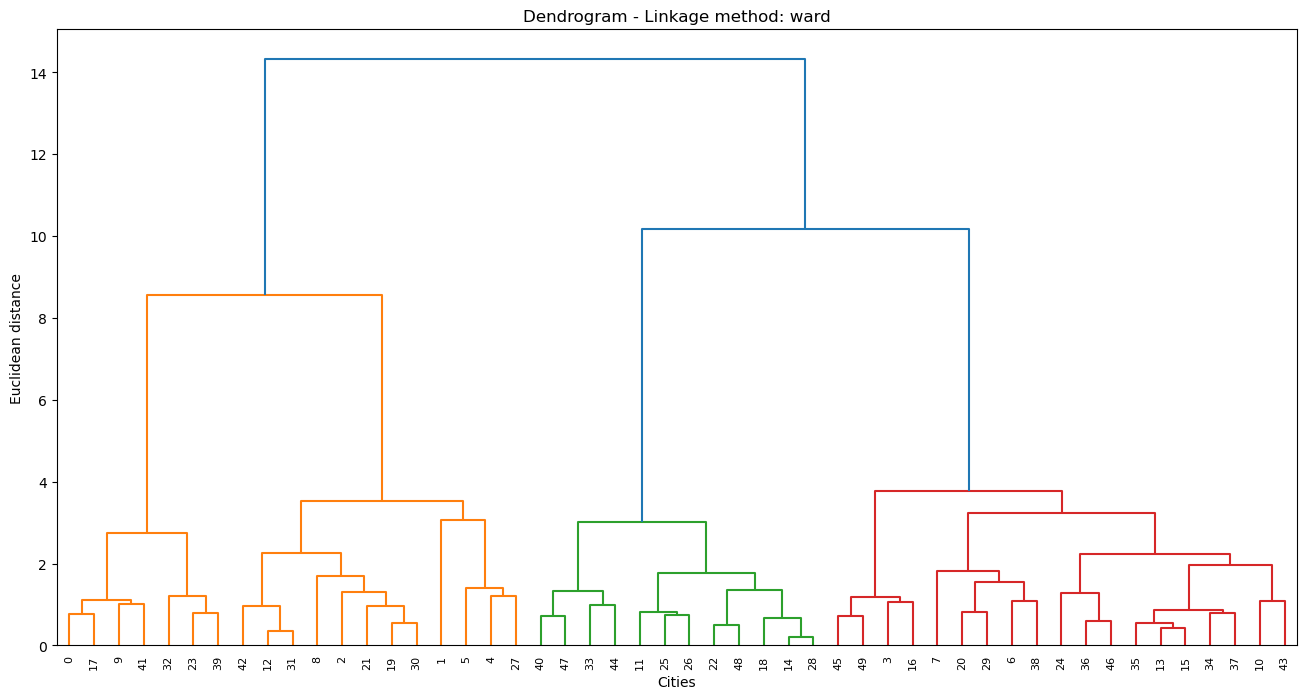

            Murder  Assault  UrbanPop  Rape  cluster
City                                                
Alabama      13.20      236        58 21.20        3
Alaska       10.00      263        48 44.50        1
Arizona       8.10      294        80 31.00        1
Arkansas      8.80      190        50 19.50        0
California    9.00      276        91 40.60        1


In [32]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Create and plot dendrogram for different linkage methods
methods = ['single', 'complete', 'average', 'ward']
for method in methods:
    linkage_matrix = sch.linkage(df_scaled, method=method)
    plt.figure(figsize=(16, 8))
    sch.dendrogram(linkage_matrix)
    plt.title("Dendrogram - Linkage method: " + method)
    plt.xlabel("Cities")
    plt.ylabel("Euclidean distance")
    plt.show()

# Train the AgglomerativeClustering model
agg_cluster = AgglomerativeClustering(n_clusters=4, linkage='ward')
agg_cluster.fit(df_scaled)

# Assign the clusters to the data and add a new column for the cluster label
df["cluster"] = agg_cluster.labels_
print(df.head())


In [17]:
# K-means clustering
from sklearn.cluster import KMeans

# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Train the KMeans model with 4 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_scaled)

# Assign the clusters to the data and add a new column for the cluster label
df["cluster"] = kmeans.labels_
print(df.head())

            Murder  Assault  UrbanPop  Rape  cluster
City                                                
Alabama      13.20      236        58 21.20        2
Alaska       10.00      263        48 44.50        1
Arizona       8.10      294        80 31.00        1
Arkansas      8.80      190        50 19.50        2
California    9.00      276        91 40.60        1


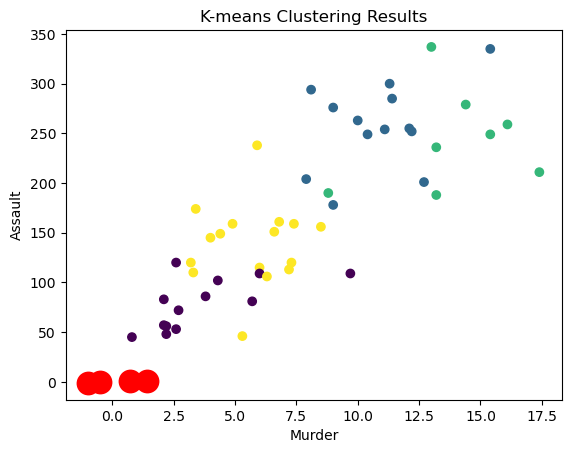

In [19]:
# Plot the data points colored by their assigned cluster label
plt.scatter(df['Murder'], df['Assault'], c=df['cluster'], cmap='viridis')

# Add the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='o', s=200, linewidths=3, color='r', zorder=10)

plt.xlabel('Murder')
plt.ylabel('Assault')
plt.title('K-means Clustering Results')
plt.show()

# Naturally we can see that the more assaults took place the higher murder rate become.